# Design Optimization 
March 11, 2021 \
A: Inner cylinder design using PEEK without mould/PDMS coating \
B: Rotating Disk

In [3]:
%run cc-methods.py

# A

## 1. Relation between inner diameter and shear for given RPM range

In [134]:
RPM_range = np.arange(300,1500,200)
# average outer radius for 24-well plate
r_0 = 0.001*(16.5+16.2)/4
r_i = 0.001*np.arange(7,8,0.075)

In [135]:
shears = [shear_Rate(i,r_0,RPM_range) for i in r_i]

In [8]:
import matplotlib.pyplot as plt

for i in range(0,len(shears)): 
    plt.plot(RPM_range,shears[i],'-',label="{:.5f}".format(r_i[i]))
#plt.yscale('log')
plt.legend(loc='right')
plt.xlabel('Velocity (RPM)')
plt.ylabel('Shear Rate (s-1)')
plt.title('Shear Range for Various Inner Radii')
plt.xlim(400,1600)

NameError: name 'shears' is not defined

(400, 1600)

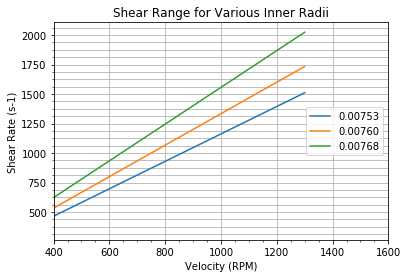

In [140]:
for i in [7,8,9]: 
    plt.plot(RPM_range,shears[i],'-',label="{:.5f}".format(r_i[i]))
#plt.yscale('log')
plt.legend(loc='right')
plt.xlabel('Velocity (RPM)')
plt.ylabel('Shear Rate (s-1)')
plt.title('Shear Range for Various Inner Radii')
plt.minorticks_on()
plt.grid(b=True, which='major')
plt.grid(b=True, axis='y',which='minor')
plt.xlim(400,1600)

**For reproducing the current shear values (600 and 1200), 7.6 mm is ideal.**

In [145]:
r_i = 7.6
height = r_i - r_i*math.tan(0.0075)
8.175 - height

0.6320010687740485

In [131]:
volume_24well(7.6,0.0075,15)

495.39285392739265

**Total volume is 495 uL**

# B

In [30]:
# accepts array of radii from centre of rotation and returns shear rates
# omega(r)/h
# omega is given in RPM for ease of use
# r and h must be in same units
def disk_Shear(omega,r,h):
    return rad(omega)*r/h

In [31]:
r_24 = np.arange(2,7,0.1) # mm
r_6 = np.arange(2,17,0.2) #mm
s_6_min = disk_Shear(400,r_6,0.2)
s_6_max = disk_Shear(1200,r_6,0.2)
s_24_min = disk_Shear(400,r_24,0.2)
s_24_max = disk_Shear(1200,r_24,0.2)

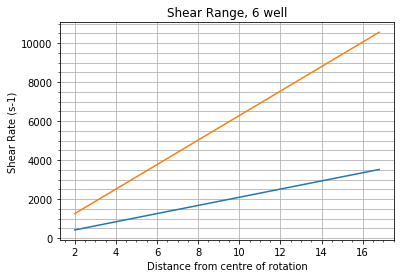

In [32]:

plt.plot(r_6,s_6_min,'-')
plt.plot(r_6,s_6_max,'-')
#plt.yscale('log')
plt.xlabel('Distance from centre of rotation')
plt.ylabel('Shear Rate (s-1)')
plt.title('Shear Range, 6 well')
plt.minorticks_on()
plt.grid(b=True, which='major')
plt.grid(b=True, axis='y',which='minor')


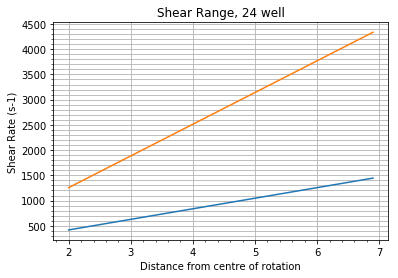

In [33]:
plt.plot(r_24,s_24_min,'-')
plt.plot(r_24,s_24_max,'-')
#plt.yscale('log')
plt.xlabel('Distance from centre of rotation')
plt.ylabel('Shear Rate (s-1)')
plt.title('Shear Range, 24 well')
plt.minorticks_on()
plt.grid(b=True, which='major')
plt.grid(b=True, axis='y',which='minor')

## Stepped Disk Model: 2 Shear Zones 

Bulk effects: would have to verify these aren't importnant using various height/speed combinations

In [72]:
# accepts array of radii from centre of rotation and returns shear rates
# omega(r)/h
# omega is given in RPM for ease of use
# r and h must be in same units
# SDM
# h1 is inner
# ratio: of surface areas, zone 1 : zone 2
def SDM_Shear(omega,r,h1,h2,frac):
    
    
    ratio = frac / (1 - frac)
    
    r_star = math.sqrt(4*ratio + max(r)**2) / math.sqrt(ratio+1)
    
    out = []
    
    for rs in r: 
        if (rs < r_star):
            out.append(rad(omega)*rs/h1)
        else: 
            out.append(rad(omega)*rs/h2)
    return np.array(out)

In [76]:
p10 = SDM_Shear(400,r_24,0.4,0.2,0.5)
p20 = SDM_Shear(400,r_24,0.4,0.2,0.8)
p40 = SDM_Shear(400,r_24,0.4,0.2,0.9)

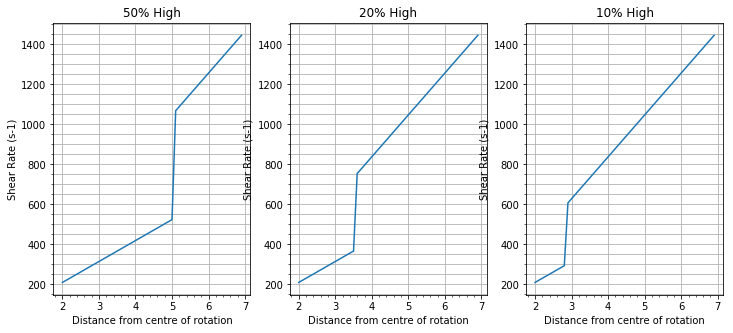

In [77]:
plt.figure(figsize=(12,5))
plt.subplot(131)
plt.plot(r_24,p10,'-')
#plt.yscale('log')
plt.xlabel('Distance from centre of rotation')
plt.ylabel('Shear Rate (s-1)')
plt.title('50% High')
plt.minorticks_on()
plt.grid(b=True, which='major')
plt.grid(b=True, axis='y',which='minor')

plt.subplot(132)
plt.plot(r_24,p20,'-')
#plt.yscale('log')
plt.xlabel('Distance from centre of rotation')
plt.ylabel('Shear Rate (s-1)')
plt.title('20% High')
plt.minorticks_on()
plt.grid(b=True, which='major')
plt.grid(b=True, axis='y',which='minor')

plt.subplot(133)
plt.plot(r_24,p40,'-')
#plt.yscale('log')
plt.xlabel('Distance from centre of rotation')
plt.ylabel('Shear Rate (s-1)')
plt.title('10% High')
plt.minorticks_on()
plt.grid(b=True, which='major')
plt.grid(b=True, axis='y',which='minor')

**Not a good system for testing a wide range of ratios due to end effects?** \
System favours high shear surface area 

**Low and High shear ranges do not stay consistent when ratio is modified** 
* necessitates precision machining of cone angle to address that